In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy: 97%


<ipython-input-3-0781b813922d>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk = data.groupby("temp_bin")["Target"].mean()


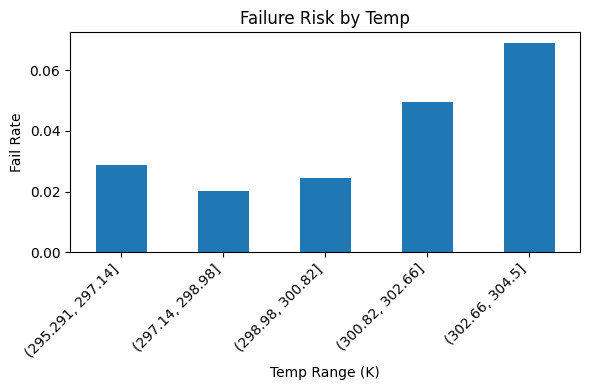

In [3]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data (update path to your file)
data = pd.read_csv("/content/drive/MyDrive/predictive_maintenance.csv")

# Clean: drop nulls, ensure numeric
data = data.dropna()
data["Air temperature [K]"] = pd.to_numeric(data["Air temperature [K]"], errors="coerce")
data["Rotational speed [rpm]"] = pd.to_numeric(data["Rotational speed [rpm]"], errors="coerce")

# Features and target
X = data[["Air temperature [K]", "Rotational speed [rpm]"]]
y = data["Target"]

# Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and check accuracy
preds = model.predict(X_test)
accuracy = (preds == y_test).mean()
print(f"Accuracy: {accuracy:.0%}")  # Shortened text

# Risk by temp range
data["temp_bin"] = pd.cut(data["Air temperature [K]"], bins=5)
risk = data.groupby("temp_bin")["Target"].mean()

# Plot with smaller size for phone
plt.figure(figsize=(6, 4))  # Smaller plot
risk.plot(kind="bar", title="Failure Risk by Temp")
plt.xlabel("Temp Range (K)")
plt.ylabel("Fail Rate")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()  # Fit everything on screen
plt.savefig("risk.png")
plt.show()

In [4]:
# After "print(f'Accuracy: {accuracy:.2%}')", add:
print(f"Training accuracy: {model.score(X_train, y_train):.2%}")
print(f"Test set size: {len(y_test)} samples")
print(f"Failure rate in test: {(y_test.mean()*100):.1f}%")

Training accuracy: 96.53%
Test set size: 2000 samples
Failure rate in test: 3.0%
